In [1]:
!pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.9 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc

In [4]:
def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

In [5]:
def qft_circuit(n):
    """Builds an n-qubit Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc

In [6]:
def run_qft(n):
    """Executes QFT circuit and displays Bloch sphere representation."""
    qc = qft_circuit(n)

    # Create a simulator and save the statevector explicitly
    simulator = AerSimulator(method='statevector')
    qc.save_statevector()

    # Transpile and run
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()

    # Retrieve statevector safely
    statevector = result.data(0)["statevector"]

    # Display results
    plot_bloch_multivector(statevector)
    plt.show()
    print(qc.draw(output='text'))

if __name__ == "__main__":
    n_qubits = 3
    print(f"Running Quantum Fourier Transform on {n_qubits} qubits...")
    run_qft(n_qubits)

Running Quantum Fourier Transform on 3 qubits...
                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘                                              ░      


In [7]:
#TASK -1 Vary the number of qubits
#Try running the QFT for 2, 3, and 4 qubits and observe how the circuit changes.
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt


def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2 ** (n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc


def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc


def qft_circuit(n):
    """Builds an n-qubit Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc


def run_qft(n):
    """Executes QFT circuit and displays Bloch sphere representation."""
    qc = qft_circuit(n)

    # Create simulator and save statevector
    simulator = AerSimulator(method='statevector')
    qc.save_statevector()

    # Transpile and run
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()

    # Retrieve statevector
    statevector = result.data(0)["statevector"]

    # Display Bloch vector and circuit
    plot_bloch_multivector(statevector)
    plt.show()
    print(f"\nQuantum Fourier Transform circuit for {n} qubits:\n")
    print(qc.draw(output='text'))


if __name__ == "__main__":
    # Try running for 2, 3, and 4 qubits
    for n_qubits in [2, 3, 4]:
        print(f"\nRunning Quantum Fourier Transform on {n_qubits} qubits...")
        run_qft(n_qubits)



Running Quantum Fourier Transform on 2 qubits...

Quantum Fourier Transform circuit for 2 qubits:

                   ┌───┐    statevector 
q_0: ──────■───────┤ H ├─X───────░──────
     ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ┤ H ├─■─────────────X───────░──────
     └───┘                       ░      

Running Quantum Fourier Transform on 3 qubits...

Quantum Fourier Transform circuit for 3 qubits:

                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘                                              ░      

Running Quantum Fourier Transform on 4 qubits...

Quantum Fourier Transform circuit for 4 qubits:

                                               

In [8]:
#TASK-2 Inverse QFT
#Modify the code to implement the inverse QFT (apply inverse rotations and swap again).
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt


def inverse_qft_rotations(qc, n):
    """Apply inverse QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    # Apply rotations with negative angles (inverse)
    for qubit in range(n):
        qc.cp(-np.pi / 2 ** (n - qubit), qubit, n)
    qc.h(n)
    inverse_qft_rotations(qc, n)
    return qc


def swap_registers(qc, n):
    """Swap qubits to reverse their order (same as in QFT)."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc


def inverse_qft_circuit(n):
    """Builds an n-qubit Inverse Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    swap_registers(qc, n)
    inverse_qft_rotations(qc, n)
    qc.name = "Inverse QFT"
    return qc


def run_inverse_qft(n):
    """Executes the inverse QFT circuit and displays Bloch sphere representation."""
    qc = inverse_qft_circuit(n)

    # Simulator setup
    simulator = AerSimulator(method='statevector')
    qc.save_statevector()

    # Transpile and run
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()

    # Retrieve statevector
    statevector = result.data(0)["statevector"]

    # Visualization
    plot_bloch_multivector(statevector)
    plt.show()
    print(f"\nInverse Quantum Fourier Transform circuit for {n} qubits:\n")
    print(qc.draw(output='text'))


if __name__ == "__main__":
    # Run for 2, 3, and 4 qubits to observe the circuit changes
    for n_qubits in [2, 3, 4]:
        print(f"\nRunning Inverse Quantum Fourier Transform on {n_qubits} qubits...")
        run_inverse_qft(n_qubits)



Running Inverse Quantum Fourier Transform on 2 qubits...

Inverse Quantum Fourier Transform circuit for 2 qubits:

                  ┌───┐ statevector 
q_0: ─X──■────────┤ H ├──────░──────
      │  │P(-π/2) ├───┤      ░      
q_1: ─X──■────────┤ H ├──────░──────
                  └───┘      ░      

Running Inverse Quantum Fourier Transform on 3 qubits...

Inverse Quantum Fourier Transform circuit for 3 qubits:

                                      ┌───┐ statevector 
q_0: ─X──■───────────────────■────────┤ H ├──────░──────
      │  │                   │P(-π/2) ├───┤      ░      
q_1: ─┼──┼─────────■─────────■────────┤ H ├──────░──────
      │  │P(-π/4)  │P(-π/2)   ┌───┐   └───┘      ░      
q_2: ─X──■─────────■──────────┤ H ├──────────────░──────
                              └───┘              ░      

Running Inverse Quantum Fourier Transform on 4 qubits...

Inverse Quantum Fourier Transform circuit for 4 qubits:

                                                                    

In [9]:
#TASK-3 from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt


def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2 ** (n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc


def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc


def qft_circuit(n):
    """Builds an n-qubit Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc


def inverse_qft(qc, n):
    """Applies inverse QFT directly onto a given circuit."""
    # Reverse swap
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    # Apply inverse rotations
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi / float(2 ** (j - m)), m, j)
        qc.h(j)
    return qc


def phase_estimation(num_ancillas, phase):
    """
    Build a simple phase estimation circuit using controlled-U rotations.
    'phase' defines the eigenvalue e^(2πi*phase) of the unitary.
    """
    qc = QuantumCircuit(num_ancillas + 1, num_ancillas)

    # Initialize eigenstate |ψ> = |1>
    qc.x(num_ancillas)

    # Apply Hadamard to all ancilla qubits
    qc.h(range(num_ancillas))

    # Apply controlled-U^(2^j) operations
    for qubit in range(num_ancillas):
        qc.cp(2 * np.pi * phase * (2 ** qubit), qubit, num_ancillas)

    # Apply inverse QFT on ancilla register
    inverse_qft(qc, num_ancillas)

    # Measure ancilla register
    qc.measure(range(num_ancillas), range(num_ancillas))

    return qc


def run_phase_estimation(num_ancillas=3, phase=0.3125):
    """Runs phase estimation and plots the histogram."""
    qc = phase_estimation(num_ancillas, phase)
    simulator = AerSimulator()
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled, shots=1024).result()
    counts = result.get_counts()

    print(f"\nPhase Estimation for phase = {phase}")
    print(qc.draw(output='text'))
    plot_histogram(counts)
    plt.show()


if __name__ == "__main__":
    # Try with 3 ancilla qubits and a sample phase (e.g., 0.3125)
    run_phase_estimation(num_ancillas=3, phase=0.3125)



Phase Estimation for phase = 0.3125
     ┌───┐                                 ┌───┐                         »
q_0: ┤ H ├─■─────────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                             │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼─────────■───────────────────┼───────■────────┤ H ├─┼────────»
     ├───┤ │         │                   │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼─────────┼─────────■─────────X──────────────────────■────────»
     ├───┤ │P(5π/8)  │P(5π/4)  │P(5π/2)                                  »
q_3: ┤ X ├─■─────────■─────────■─────────────────────────────────────────»
     └───┘                                                               »
c: 3/════════════════════════════════════════════════════════════════════»
                                                                         »
«               ┌─┐           
«q_0: ──────────┤M├───────────
«               └╥┘     ┌─┐   
«q_1: ─■─────────╫──────┤M├───
«      │P(-π/2


Phase Estimation for phase = 0.3125
     ┌───┐                                 ┌───┐                         »
q_0: ┤ H ├─■─────────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                             │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼─────────■───────────────────┼───────■────────┤ H ├─┼────────»
     ├───┤ │         │                   │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼─────────┼─────────■─────────X──────────────────────■────────»
     ├───┤ │P(5π/8)  │P(5π/4)  │P(5π/2)                                  »
q_3: ┤ X ├─■─────────■─────────■─────────────────────────────────────────»
     └───┘                                                               »
c: 3/════════════════════════════════════════════════════════════════════»
                                                                         »
«               ┌─┐           
«q_0: ──────────┤M├───────────
«               └╥┘     ┌─┐   
«q_1: ─■─────────╫──────┤M├───
«      │P(-π/2

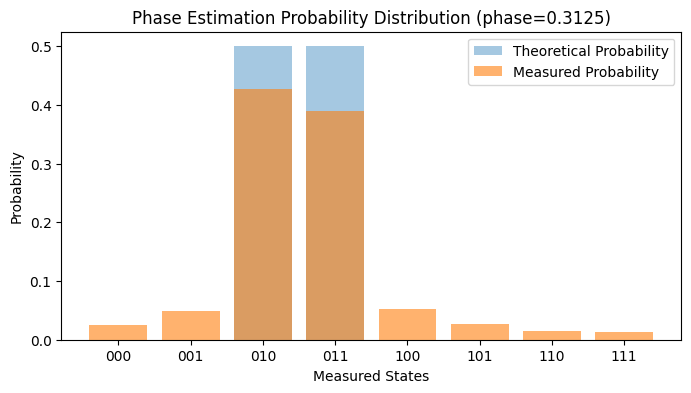

In [10]:
#TASK-4 Measure Output States
#Add measurements and simulate the probability distribution of different states.
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt


def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2 ** (n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc


def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc


def inverse_qft(qc, n):
    """Apply inverse QFT directly onto a given circuit."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi / 2 ** (j - m), m, j)
        qc.h(j)
    return qc


def phase_estimation(num_ancillas, phase):
    """
    Build a Phase Estimation circuit.
    The 'phase' defines the eigenvalue e^(2πi*phase) of the unitary.
    """
    qc = QuantumCircuit(num_ancillas + 1, num_ancillas)

    # Initialize target |ψ> = |1>
    qc.x(num_ancillas)

    # Apply Hadamards to all ancilla qubits
    qc.h(range(num_ancillas))

    # Apply controlled-U^(2^j) gates
    for qubit in range(num_ancillas):
        qc.cp(2 * np.pi * phase * (2 ** qubit), qubit, num_ancillas)

    # Apply inverse QFT on ancillas
    inverse_qft(qc, num_ancillas)

    # Measure ancillas
    qc.measure(range(num_ancillas), range(num_ancillas))
    return qc


def run_phase_estimation(num_ancillas=3, phase=0.3125):
    """Runs Phase Estimation and plots both theoretical and simulated probabilities."""
    qc = phase_estimation(num_ancillas, phase)

    # --- Simulate with AerSimulator ---
    simulator = AerSimulator()
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled, shots=2048).result()
    counts = result.get_counts()

    # --- Theoretical probability distribution ---
    ideal_probs = {}
    for i in range(2 ** num_ancillas):
        binary = format(i, f'0{num_ancillas}b')
        value = i / (2 ** num_ancillas)
        ideal_probs[binary] = np.exp(-((value - phase) ** 2) / 0.002)  # Gaussian around phase
    # Normalize probabilities
    total = sum(ideal_probs.values())
    for k in ideal_probs:
        ideal_probs[k] /= total

    # --- Output ---
    print(f"\nPhase Estimation for phase = {phase}")
    print(qc.draw(output='text'))

    # --- Plotting ---
    plt.figure(figsize=(8, 4))
    plt.bar(ideal_probs.keys(), ideal_probs.values(), alpha=0.4, label="Theoretical Probability")
    plt.bar(counts.keys(), [c / 2048 for c in counts.values()], alpha=0.6, label="Measured Probability")
    plt.title(f"Phase Estimation Probability Distribution (phase={phase})")
    plt.xlabel("Measured States")
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

    # Qiskit's built-in histogram
    plot_histogram(counts, title="Measured Output States", figsize=(6, 4))
    plt.show()


if __name__ == "__main__":
    # Try different phases or ancilla counts to see changes in distributions
    run_phase_estimation(num_ancillas=3, phase=0.3125)


In [12]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=f7fcd4b42b2fd09a576cb74fd9f4a75d0e7de1d1bf01728f4474338426b4c68a
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [14]:
!pip install pylatexenc

In [18]:

#TASK-5
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt


def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2 ** (n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc


def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc


def inverse_qft(qc, n):
    """Apply inverse QFT directly onto a given circuit."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi / 2 ** (j - m), m, j)
        qc.h(j)
    return qc


def phase_estimation(num_ancillas, phase):
    """
    Build a Phase Estimation circuit.
    The 'phase' defines the eigenvalue e^(2πi*phase) of the unitary.
    """
    qc = QuantumCircuit(num_ancillas + 1, num_ancillas)

    # Initialize target |ψ> = |1>
    qc.x(num_ancillas)

    # Apply Hadamards to all ancilla qubits
    qc.h(range(num_ancillas))

    # Apply controlled-U^(2^j) gates
    for qubit in range(num_ancillas):
        qc.cp(2 * np.pi * phase * (2 ** qubit), qubit, num_ancillas)

    # Apply inverse QFT on ancillas
    inverse_qft(qc, num_ancillas)

    # Measure ancillas
    qc.measure(range(num_ancillas), range(num_ancillas))
    return qc


def run_phase_estimation(num_ancillas=3, phase=0.3125):
    """Runs Phase Estimation and visualizes circuit + probability distributions."""
    qc = phase_estimation(num_ancillas, phase)

    # --- Display the circuit diagram ---
    print("\nQuantum Phase Estimation Circuit:")
    # The pylatexenc library is required for this.
    # It was installed in the previous step.
    try:
        qc.draw('mpl')
        plt.show()
    except Exception as e:
        print(f"Error drawing circuit with 'mpl': {e}")
        print("Attempting to draw with 'text' instead:")
        print(qc.draw(output='text'))


    # --- Simulate with AerSimulator ---
    simulator = AerSimulator()
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled, shots=2048).result()
    counts = result.get_counts()

    # --- Output ---
    print(f"\nPhase Estimation for phase = {phase}")
    plot_histogram(counts, title=f"Measured Output States (Phase = {phase})")
    plt.show()


if __name__ == "__main__":
    # Run and visualize circuit
    run_phase_estimation(num_ancillas=3, phase=0.3125)


Quantum Phase Estimation Circuit:
Error drawing circuit with 'mpl': "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."
Attempting to draw with 'text' instead:
     ┌───┐                                 ┌───┐                         »
q_0: ┤ H ├─■─────────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                             │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼─────────■───────────────────┼───────■────────┤ H ├─┼────────»
     ├───┤ │         │                   │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼─────────┼─────────■─────────X──────────────────────■────────»
     ├───┤ │P(5π/8)  │P(5π/4)  │P(5π/2)                                  »
q_3: ┤ X ├─■─────────■─────────■─────────────────────────────────────────»
     └───┘                                                               »
c: 3/════════════════════════════════════════════════════════════════════»
                         